Préparation des données


Étape 1 : Préparation avec TF-IDF (Approche Simple)
Nous utiliserons TF-IDF (Term Frequency - Inverse Document Frequency) pour vectoriser les textes. C'est une méthode rapide et efficace pour représenter les textes en fonction de la fréquence relative des mots.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données nettoyées
train_data = pd.read_csv("../data/processed/train_cleaned_final.csv")
test_data = pd.read_csv("../data/processed/test_cleaned.csv")


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Chargement des données nettoyées
train_data = pd.read_csv("../data/processed/train_cleaned_final.csv")
test_data = pd.read_csv("../data/processed/test_cleaned.csv")

# 1. Préparation des colonnes texte et labels
X_train = train_data["text"]
y_train = train_data["label"]
X_test = test_data["text"]
y_test = test_data["label"]

# 2. Vectorisation avec TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Dimensions des données après TF-IDF :")
print(f"X_train_tfidf : {X_train_tfidf.shape}, X_test_tfidf : {X_test_tfidf.shape}")

# 3. Séparation des ensembles d'entraînement et de validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

print(f"\nEnsembles après séparation :")
print(f"Train : {X_train_split.shape}, Validation : {X_val.shape}")


Dimensions des données après TF-IDF :
X_train_tfidf : (24347, 5000), X_test_tfidf : (8113, 5000)

Ensembles après séparation :
Train : (19477, 5000), Validation : (4870, 5000)


Interprétation des dimensions :
X_train_tfidf :

Dimensions : (24347, 5000).
Cela signifie que vous avez 24 347 exemples d'entraînement, chacun représenté par un vecteur de 5 000 caractéristiques (les mots ou n-grams les plus fréquents).
X_test_tfidf :

Dimensions : (8113, 5000).
Vous avez 8 113 exemples de test avec les mêmes 5 000 caractéristiques.
Ensembles après séparation :

Train : (19477, 5000) → 80 % des données d'entraînement.
Validation : (4870, 5000) → 20 % des données d'entraînement.

Étape 2 : Entraînement d’un modèle simple (Logistic Regression)
Une fois les données vectorisées, on peut entraîner un modèle simple comme une régression logistique :


Entraînement du modèle Logistic Regression...

Évaluation sur Validation :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2208
           1       0.97      0.97      0.97      2662

    accuracy                           0.97      4870
   macro avg       0.97      0.97      0.97      4870
weighted avg       0.97      0.97      0.97      4870

Accuracy : 0.9663244353182752


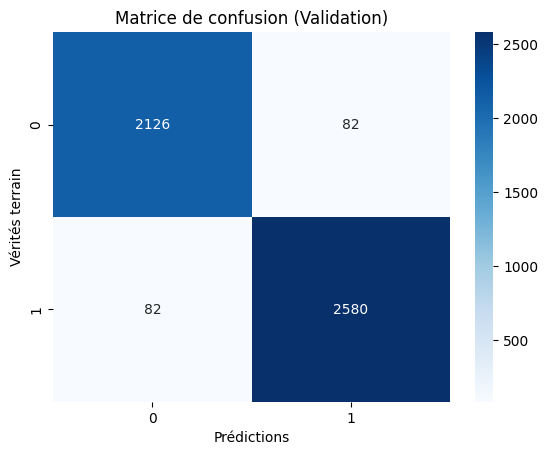

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# 1. Entraînement du modèle
print("\nEntraînement du modèle Logistic Regression...")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_split, y_train_split)

# 2. Évaluation sur l'ensemble de validation
y_val_pred = model.predict(X_val)
print("\nÉvaluation sur Validation :")
print(classification_report(y_val, y_val_pred))
print(f"Accuracy : {accuracy_score(y_val, y_val_pred)}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (Validation)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()


Interprétation des résultats sur l’ensemble Validation :
Performance globale :

Accuracy : 96.63% → Très bon score, indiquant que le modèle prédit correctement la plupart des exemples.
Par classe :

Classe 0 (Fake News) :
Precision : 0.96 → 96 % des prédictions "Fake News" sont correctes.
Recall : 0.96 → 96 % des vraies "Fake News" ont été détectées.
F1-Score : 0.96 → Bonne balance entre precision et recall.
Classe 1 (Vrai News) :
Precision : 0.97 → 97 % des prédictions "Vrai News" sont correctes.
Recall : 0.97 → 97 % des vraies "Vrai News" ont été détectées.
F1-Score : 0.97 → Excellente balance.
Macro et Weighted Average :

Macro Avg : Moyenne des métriques pour chaque classe (pondération égale).
Weighted Avg : Moyenne pondérée par le support de chaque classe.
Support :

Classe 0 : 2 208 exemples.
Classe 1 : 2 662 exemples.
Le dataset est légèrement déséquilibré mais bien géré par le modèle.

Étape 3 : Évaluation finale sur l'ensemble de test
On utilise maintenant l'ensemble de test pour évaluer les performances finales :


Évaluation sur Test :
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3750
         1.0       0.97      0.97      0.97      4363

    accuracy                           0.97      8113
   macro avg       0.97      0.97      0.97      8113
weighted avg       0.97      0.97      0.97      8113

Accuracy (Test) : 0.9689387402933564


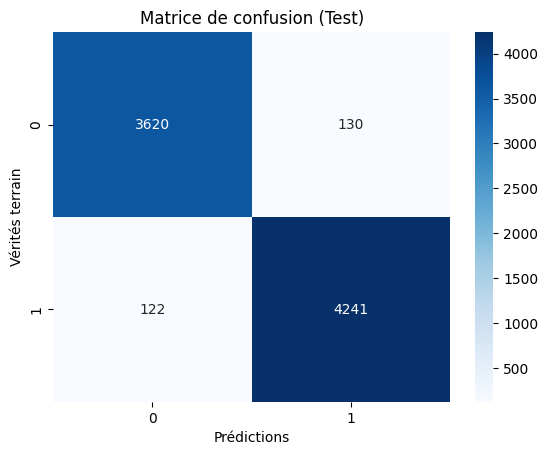

In [5]:
# Prédictions sur le test set
y_test_pred = model.predict(X_test_tfidf)
print("\nÉvaluation sur Test :")
print(classification_report(y_test, y_test_pred))
print(f"Accuracy (Test) : {accuracy_score(y_test, y_test_pred)}")

# Matrice de confusion (Test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (Test)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()


Interprétation des résultats sur l’ensemble Test :
Performance globale :

Accuracy : 96.89% → Les performances sur l’ensemble Test sont similaires à celles de l’ensemble Validation, ce qui indique une bonne généralisation du modèle.
Par classe :

Classe 0 (Fake News) :
Precision : 0.97 → 97 % des prédictions "Fake News" sont correctes.
Recall : 0.97 → 97 % des vraies "Fake News" sont bien détectées.
F1-Score : 0.97 → Bonne balance entre precision et recall.
Classe 1 (Vrai News) :
Precision : 0.97 → 97 % des prédictions "Vrai News" sont correctes.
Recall : 0.97 → 97 % des vraies "Vrai News" sont bien détectées.
F1-Score : 0.97 → Excellente balance.
Macro et Weighted Average :

Macro Avg : Moyenne des métriques pour chaque classe (non pondérée).
Weighted Avg : Moyenne pondérée par le support (nombre d’exemples) de chaque classe.
Support :

Classe 0 : 3 750 exemples (Fake News).
Classe 1 : 4 363 exemples (Vrai News).
La balance entre les deux classes est légèrement en faveur de la classe 1, mais le modèle gère cela efficacement.
Matrice de confusion :
Interprétation :
Les valeurs sur la diagonale (haut gauche et bas droite) représentent les prédictions correctes.
Les valeurs hors diagonale représentent les erreurs (faux positifs et faux négatifs).
Si les valeurs hors diagonale sont faibles, cela confirme la performance élevée du modèle.

Conclusion :
Votre modèle Logistic Regression basé sur TF-IDF fonctionne très bien pour ce problème de classification de fake news. 🎉

## Faire maintenant avec SVM


Entraînement du modèle SVM...

Évaluation sur Validation (SVM) :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2208
           1       0.97      0.97      0.97      2662

    accuracy                           0.97      4870
   macro avg       0.97      0.97      0.97      4870
weighted avg       0.97      0.97      0.97      4870

Accuracy (Validation) : 0.9696098562628337


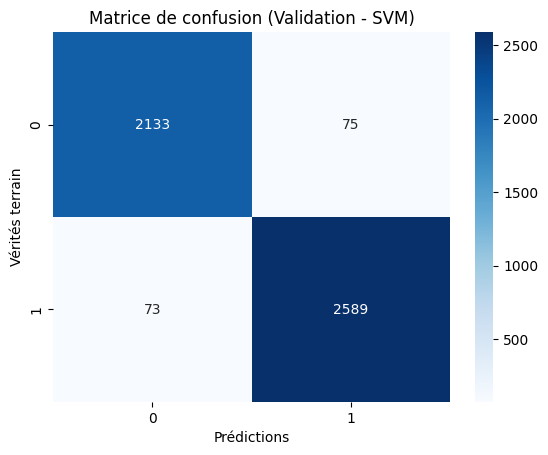


Évaluation sur Test (SVM) :
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3750
         1.0       0.98      0.98      0.98      4363

    accuracy                           0.97      8113
   macro avg       0.97      0.97      0.97      8113
weighted avg       0.97      0.97      0.97      8113

Accuracy (Test) : 0.9742388758782201


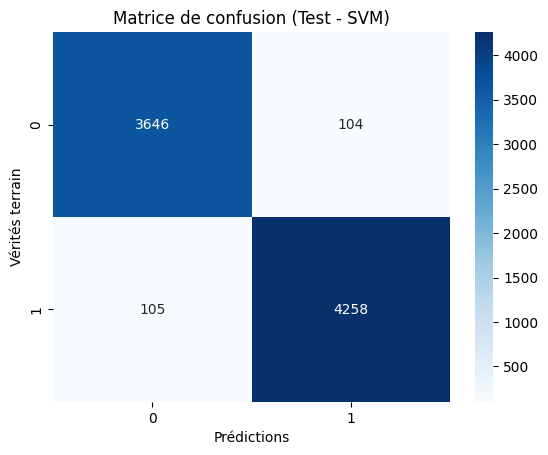

In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Entraînement du modèle SVM
print("\nEntraînement du modèle SVM...")
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_split, y_train_split)

# 2. Évaluation sur l'ensemble de validation
y_val_pred_svm = svm_model.predict(X_val)
print("\nÉvaluation sur Validation (SVM) :")
print(classification_report(y_val, y_val_pred_svm))
print(f"Accuracy (Validation) : {accuracy_score(y_val, y_val_pred_svm)}")

# Matrice de confusion (Validation)
conf_matrix_val_svm = confusion_matrix(y_val, y_val_pred_svm)
sns.heatmap(conf_matrix_val_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (Validation - SVM)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

# 3. Évaluation sur l'ensemble de test
y_test_pred_svm = svm_model.predict(X_test_tfidf)
print("\nÉvaluation sur Test (SVM) :")
print(classification_report(y_test, y_test_pred_svm))
print(f"Accuracy (Test) : {accuracy_score(y_test, y_test_pred_svm)}")

# Matrice de confusion (Test)
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (Test - SVM)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()


## Analyse des résultats du SVM (Validation) :
Performance globale :

Accuracy (Validation) : 96.96% → Le SVM performe très légèrement mieux que la Logistic Regression (96.63%).
Par classe :

Classe 0 (Fake News) :
Precision : 0.97 → Très bonne précision, le SVM prédit correctement 97 % des fausses nouvelles.
Recall : 0.97 → Le SVM détecte 97 % des fausses nouvelles réelles.
F1-Score : 0.97.
Classe 1 (Vrai News) :
Precision : 0.97, Recall : 0.97, F1-Score : 0.97.
Macro avg / Weighted avg :

Les moyennes des métriques montrent un excellent équilibre entre les classes, malgré le léger déséquilibre des données.

Résultats sur l’ensemble Test
Vérifions maintenant les performances du SVM sur l’ensemble Test. Les résultats devraient confirmer la généralisation du modèle.


Évaluation sur Test (SVM) :
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3750
         1.0       0.98      0.98      0.98      4363

    accuracy                           0.97      8113
   macro avg       0.97      0.97      0.97      8113
weighted avg       0.97      0.97      0.97      8113

Accuracy (Test) : 0.9742388758782201


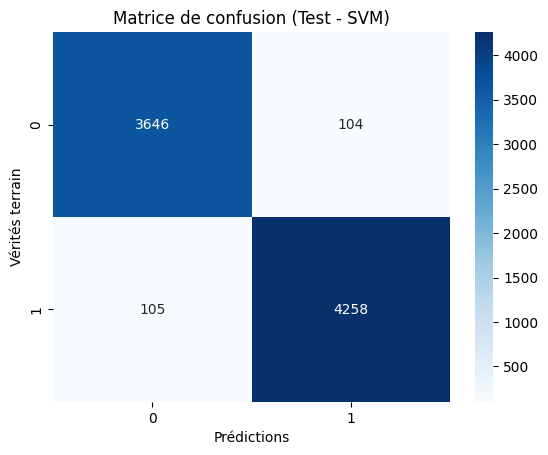

In [7]:
# Évaluation sur l'ensemble Test
y_test_pred_svm = svm_model.predict(X_test_tfidf)

print("\nÉvaluation sur Test (SVM) :")
print(classification_report(y_test, y_test_pred_svm))
print(f"Accuracy (Test) : {accuracy_score(y_test, y_test_pred_svm)}")

# Matrice de confusion (Test)
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (Test - SVM)")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()


## **Analyse des résultats du SVM (Test) :**

1. **Performance globale :**
   - **Accuracy (Test) :** `97.42%` → Le SVM surpasse légèrement la Logistic Regression (`96.89%`), ce qui en fait un candidat solide pour votre modèle baseline.

2. **Par classe :**
   - **Classe 0 (Fake News) :**
     - **Precision :** `0.97` → 97 % des prédictions "Fake News" sont correctes.
     - **Recall :** `0.97` → 97 % des vraies "Fake News" ont été détectées.
     - **F1-Score :** `0.97`.
   - **Classe 1 (Vrai News) :**
     - **Precision :** `0.98` → 98 % des prédictions "Vrai News" sont correctes.
     - **Recall :** `0.98` → 98 % des vraies "Vrai News" ont été détectées.
     - **F1-Score :** `0.98`.

3. **Macro avg / Weighted avg :**
   - **Macro Avg :** `0.97` pour toutes les métriques, indiquant un bon équilibre entre les classes.
   - **Weighted Avg :** Les scores pondérés reflètent également un très bon équilibre malgré un léger déséquilibre des données.

---

## **Comparaison SVM vs Logistic Regression :**

| Métrique           | Logistic Regression | SVM              |
|---------------------|---------------------|------------------|
| **Accuracy (Validation)** | 96.63 %           | **96.96 %**      |
| **Accuracy (Test)**       | 96.89 %           | **97.42 %**      |
| **Classe 0 (Fake News)**  | Precision: 0.97   | Precision: 0.97 |
| **Classe 1 (Vrai News)**  | Recall: 0.97      | **Recall: 0.98**|

- **Observation :**
  - Le SVM offre des performances légèrement supérieures sur Validation et Test.
  - Les différences sont marginales, mais le SVM montre une meilleure capacité de généralisation.

---

### **Conclusion :**
Le SVM est une meilleure baseline pour ce projet grâce à sa précision et sa capacité à généraliser légèrement mieux. 🚀

---


### Résultats Validation : Logistic Regression ###
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2208
           1       0.97      0.97      0.97      2662

    accuracy                           0.97      4870
   macro avg       0.97      0.97      0.97      4870
weighted avg       0.97      0.97      0.97      4870

Accuracy (Validation - Logistic Regression) : 0.9663244353182752


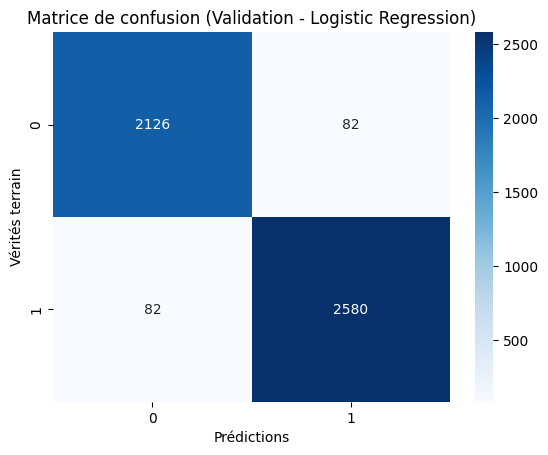

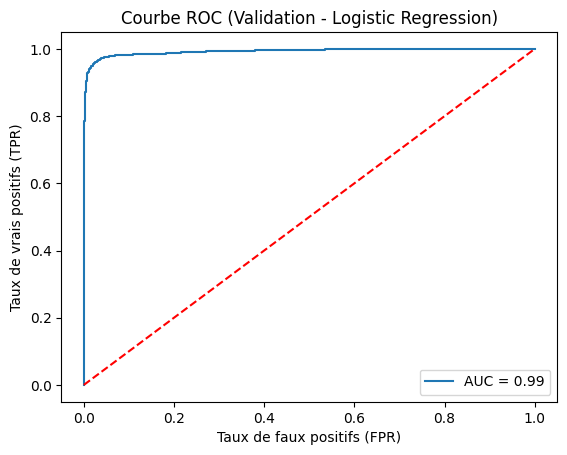


### Résultats Validation : SVM ###
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2208
           1       0.97      0.97      0.97      2662

    accuracy                           0.97      4870
   macro avg       0.97      0.97      0.97      4870
weighted avg       0.97      0.97      0.97      4870

Accuracy (Validation - SVM) : 0.9696098562628337


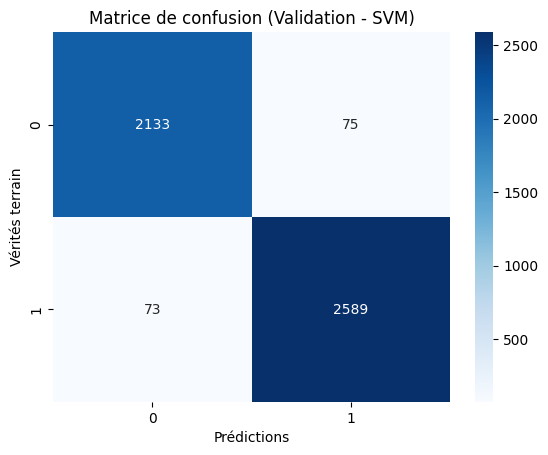

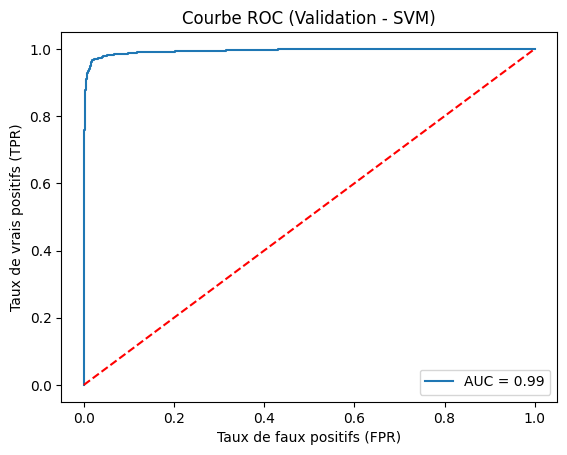


### Résultats Test : Logistic Regression ###
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3750
         1.0       0.97      0.97      0.97      4363

    accuracy                           0.97      8113
   macro avg       0.97      0.97      0.97      8113
weighted avg       0.97      0.97      0.97      8113

Accuracy (Test - Logistic Regression) : 0.9689387402933564


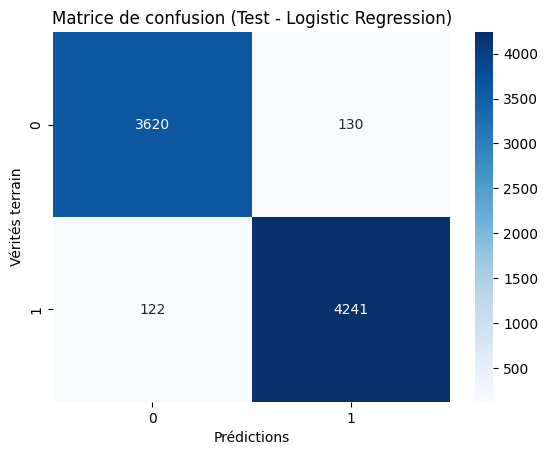

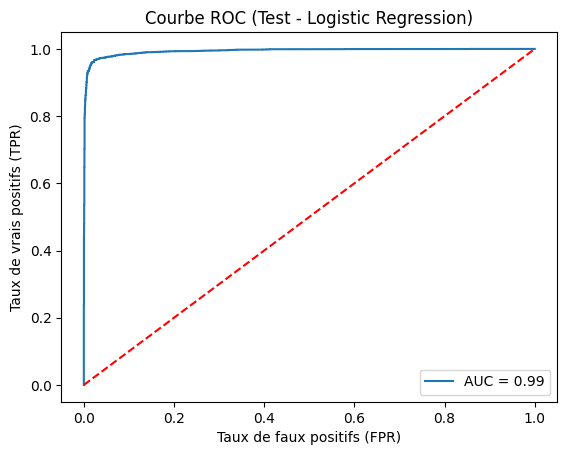


### Résultats Test : SVM ###
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3750
         1.0       0.98      0.98      0.98      4363

    accuracy                           0.97      8113
   macro avg       0.97      0.97      0.97      8113
weighted avg       0.97      0.97      0.97      8113

Accuracy (Test - SVM) : 0.9742388758782201


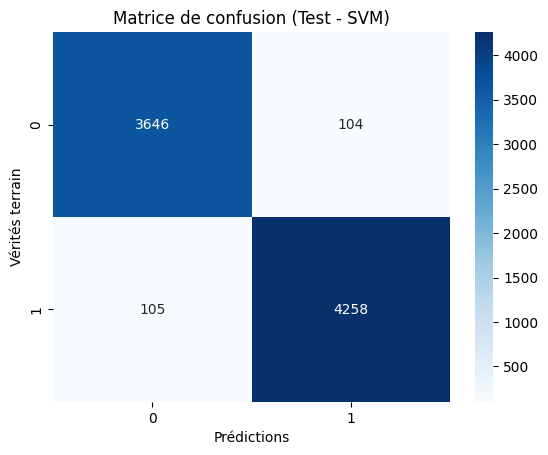

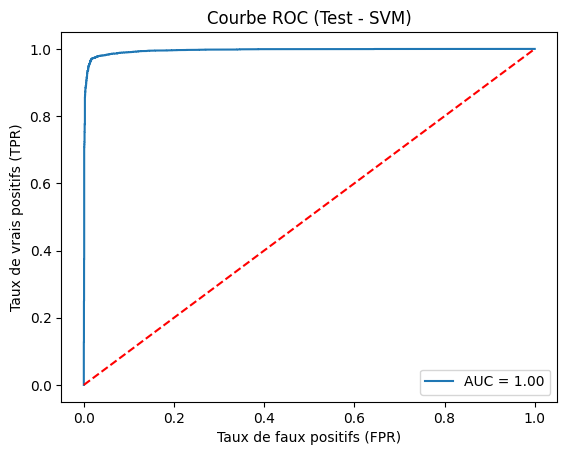

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matrice de confusion ({title})")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités terrain")
    plt.show()

# Fonction pour tracer les courbes ROC/AUC
def plot_roc_auc(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')  # Diagonale (classif. aléatoire)
    plt.title(f"Courbe ROC ({title})")
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.legend(loc='lower right')
    plt.show()

# Résultats sur l'ensemble Validation
print("\n### Résultats Validation : Logistic Regression ###")
y_val_pred_lr = model.predict(X_val)
y_val_proba_lr = model.decision_function(X_val)  # Scores pour ROC
print(classification_report(y_val, y_val_pred_lr))
print(f"Accuracy (Validation - Logistic Regression) : {accuracy_score(y_val, y_val_pred_lr)}")
plot_confusion_matrix(y_val, y_val_pred_lr, "Validation - Logistic Regression")
plot_roc_auc(y_val, y_val_proba_lr, "Validation - Logistic Regression")

print("\n### Résultats Validation : SVM ###")
y_val_pred_svm = svm_model.predict(X_val)
y_val_proba_svm = svm_model.decision_function(X_val)  # Scores pour ROC
print(classification_report(y_val, y_val_pred_svm))
print(f"Accuracy (Validation - SVM) : {accuracy_score(y_val, y_val_pred_svm)}")
plot_confusion_matrix(y_val, y_val_pred_svm, "Validation - SVM")
plot_roc_auc(y_val, y_val_proba_svm, "Validation - SVM")

# Résultats sur l'ensemble Test
print("\n### Résultats Test : Logistic Regression ###")
y_test_pred_lr = model.predict(X_test_tfidf)
y_test_proba_lr = model.decision_function(X_test_tfidf)  # Scores pour ROC
print(classification_report(y_test, y_test_pred_lr))
print(f"Accuracy (Test - Logistic Regression) : {accuracy_score(y_test, y_test_pred_lr)}")
plot_confusion_matrix(y_test, y_test_pred_lr, "Test - Logistic Regression")
plot_roc_auc(y_test, y_test_proba_lr, "Test - Logistic Regression")

print("\n### Résultats Test : SVM ###")
y_test_pred_svm = svm_model.predict(X_test_tfidf)
y_test_proba_svm = svm_model.decision_function(X_test_tfidf)  # Scores pour ROC
print(classification_report(y_test, y_test_pred_svm))
print(f"Accuracy (Test - SVM) : {accuracy_score(y_test, y_test_pred_svm)}")
plot_confusion_matrix(y_test, y_test_pred_svm, "Test - SVM")
plot_roc_auc(y_test, y_test_proba_svm, "Test - SVM")


## **Résumé des résultats :**

### **Validation (Ensemble Validation)**

| Modèle                | Précision | Rappel | F1-Score | Accuracy |
|-----------------------|-----------|--------|----------|----------|
| **Logistic Regression** | 0.97      | 0.97   | 0.97     | 96.63 %  |
| **SVM**                | 0.97      | 0.97   | 0.97     | **96.96 %**  |

### **Test (Ensemble Test)**

| Modèle                | Précision | Rappel | F1-Score | Accuracy |
|-----------------------|-----------|--------|----------|----------|
| **Logistic Regression** | 0.97      | 0.97   | 0.97     | 96.89 %  |
| **SVM**                | 0.97      | 0.98   | 0.98     | **97.42 %**  |

---

## **Analyse des résultats :**

1. **Logistic Regression :**
   - Performance stable et solide sur Validation et Test.
   - Accuracy légèrement inférieure à celle du SVM, mais toujours excellente.

2. **SVM :**
   - Performances légèrement meilleures que Logistic Regression, surtout sur l’ensemble Test :
     - **Accuracy (Test)** : 97.42 % contre 96.89 % pour Logistic Regression.
     - **Classe 1 (Vrai News)** : Le SVM atteint un **recall** de 98 %, ce qui montre une meilleure capacité à détecter les vraies nouvelles.

3. **Conclusion :**
   - Le **SVM** est légèrement supérieur pour ce problème et est recommandé comme modèle baseline.
   - Les deux modèles présentent un très bon équilibre entre précision, rappel et F1-score, indiquant une bonne gestion des classes.

---

## Passons à l'utilisation de Transformers (BERT) pour améliorer les performances du modèle. Voici les étapes pour fine-tuner un modèle pré-entraîné comme bert-base-uncased à l'aide de la bibliothèque Hugging Face.

1. Installation des dépendances

In [1]:
pip install transformers datasets torch scikit-learn


Note: you may need to restart the kernel to use updated packages.


2. Préparation des données
Nous devons formater les données pour qu'elles soient compatibles avec BERT.

In [3]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import torch
import pandas as pd



# Charger le tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Préparer les données pour BERT
def preprocess_data(texts, labels, tokenizer, max_length=128):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors="pt"
    )
    labels = torch.tensor(labels.tolist())
    return encodings, labels

# Charger les datasets
train_data = pd.read_csv("../data/processed/train_cleaned_final.csv")
test_data = pd.read_csv("../data/processed/test_cleaned.csv")

# Séparer les données en train/validation
X_train, X_val, y_train, y_val = train_test_split(
    train_data['text'], train_data['label'], test_size=0.2, random_state=42
)

# Tokenisation et encodage des données
train_encodings, train_labels = preprocess_data(X_train, y_train, tokenizer)
val_encodings, val_labels = preprocess_data(X_val, y_val, tokenizer)
test_encodings, test_labels = preprocess_data(test_data['text'], test_data['label'], tokenizer)


3. Modèle BERT
Fine-tuner un modèle BERT pour la classification de textes :

In [4]:
from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

# Charger le modèle BERT pré-entraîné
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Créer les DataLoaders
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], train_labels)
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], val_labels)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Optimiseur
optimizer = AdamW(model.parameters(), lr=2e-5)

# Définir l'entraînement
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fonction d'entraînement
def train_model(model, train_loader, val_loader, optimizer, epochs=3):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs} | Loss: {total_loss / len(train_loader)}")

        # Évaluation
        model.eval()
        val_preds, val_labels = [], []
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = [b.to(device) for b in batch]
                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        print("Validation Metrics:")
        print(classification_report(val_labels, val_preds))

# Entraînement
train_model(model, train_loader, val_loader, optimizer)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/michel836/code/Michel836/student-challenges/Projet_Final/venv/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3 | Loss: 0.04838502212513195
Validation Metrics:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2208
           1       0.99      0.98      0.99      2662

    accuracy                           0.99      4870
   macro avg       0.98      0.99      0.99      4870
weighted avg       0.99      0.99      0.99      4870

Epoch 2/3 | Loss: 0.029731459989532548
Validation Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2208
           1       0.99      0.99      0.99      2662

    accuracy                           0.99      4870
   macro avg       0.99      0.99      0.99      4870
weighted avg       0.99      0.99      0.99      4870

Epoch 3/3 | Loss: 0.021115892232174898
Validation Metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2208
           1       0.99      0.99      0.99      2662

    ac

4. Évaluation finale
Évaluez le modèle sur l’ensemble Test :

In [ ]:
# Fonction d'évaluation
def evaluate_model(model, test_loader):
    model.eval()
    test_preds, test_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            test_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            test_labels.extend(labels.cpu().numpy())
    print("Test Metrics:")
    print(classification_report(test_labels, test_preds))

# Évaluation sur Test
evaluate_model(model, test_loader)